In [1]:
import cv2
import numpy as np
import os
import glob
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen= keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.33, 
    rescale=1./255 
)
train_ds = datagen.flow_from_directory(
    r'C:\machine learning\fingers',
    target_size=(256, 256), 
    batch_size=32,
    class_mode='categorical',
    subset='training') 


val_ds = datagen.flow_from_directory(
    r'C:\machine learning\fingers', 
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1388 images belonging to 10 classes.
Found 674 images belonging to 10 classes.


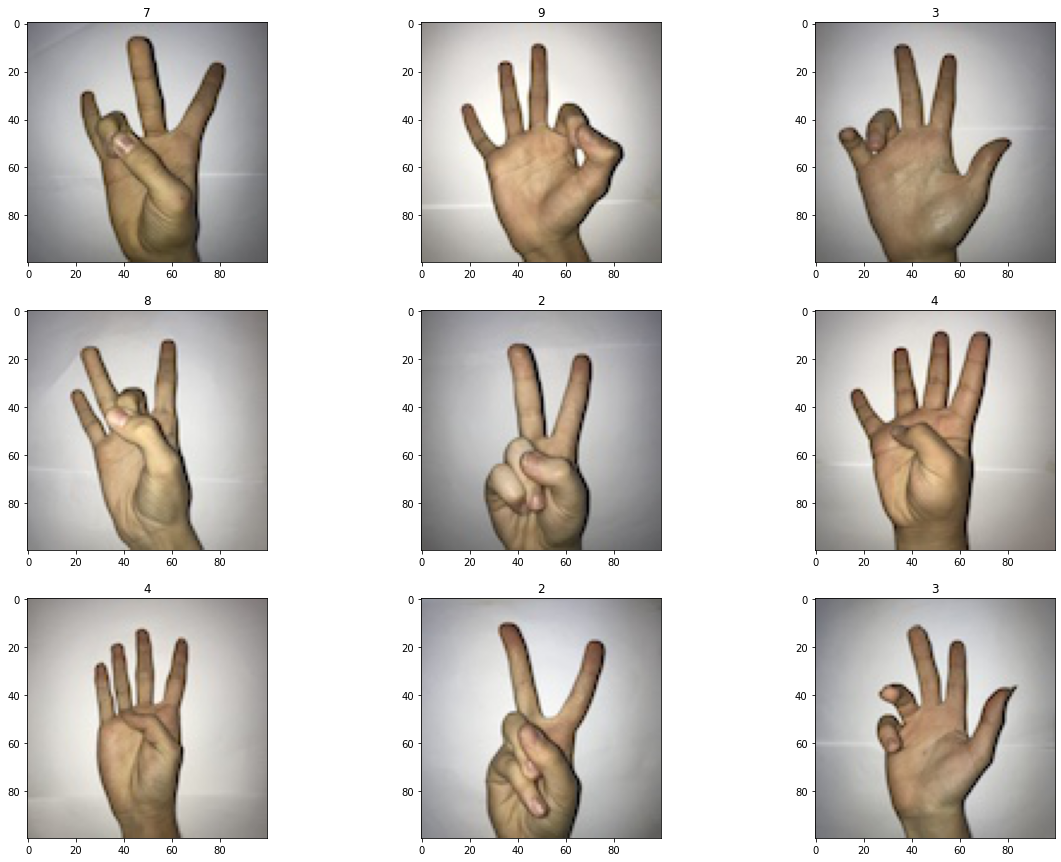

In [3]:
import random

fig, axes = plt.subplots(3,3, figsize=(20, 15))

indices_classes = {v: k for k, v in train_ds.class_indices.items()} #Словарь классов
images_classes = list(zip(train_ds.filepaths, [indices_classes[k] for k in train_ds.classes])) #Разныце пути для картинок
for ax in axes.reshape(-1):
    random_image = random.choice(images_classes)
    img = mpimg.imread(random_image[0])
    ax.set_title(random_image[1])
    ax.imshow(img)

In [4]:
def print_loss(result): #График Loss
    plt.figure(figsize=(15,10))
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

In [5]:
IMG_SHAPE = (256, 256, 3)

base_model = keras.applications.ResNet50V2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

In [6]:
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                        

In [7]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=3,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])
results = model.evaluate(val_ds)


Epoch 1/3
44/44 [==============================] - 117s 3s/step - loss: 1.0325 - accuracy: 0.6643 - val_loss: 0.6259 - val_accuracy: 0.7834
Epoch 2/3
44/44 [==============================] - 115s 3s/step - loss: 0.3056 - accuracy: 0.9042 - val_loss: 0.4835 - val_accuracy: 0.8323
Epoch 3/3
22/22 [==============================] - 38s 2s/step - loss: 0.5080 - accuracy: 0.8412


In [8]:
test_results = {}
    
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.50801
Test Accuracy: 84.12%


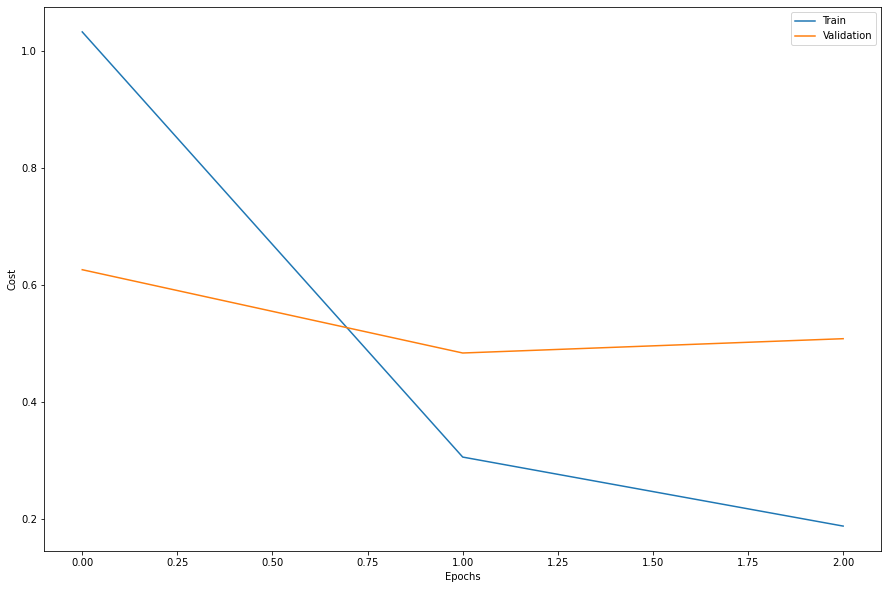

In [9]:
print_loss(history)

In [10]:
####model.save(r'C:\machine learning\first\first_ResNet50V2_model')